In [2]:
'''
Train loss: 1.3808243402862548
Train accuracy: 0.52742
Test loss: 1.46340176486969
Test accuracy: 0.4868
''' 
    
from  __future__  import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 125
num_classes = 10
epochs = 32

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


50000 train samples
10000 test samples


In [5]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/32
50000/50000 [==============================] - 53s 1ms/step - loss: 7.2552 - acc: 0.1651 - val_loss: 1.9028 - val_acc: 0.2999
Epoch 2/32
50000/50000 [==============================] - 52s 1ms/step - loss: 1.9292 - acc: 0.3019 - val_loss: 1.8147 - val_acc: 0.3502
Epoch 3/32
50000/50000 [==============================] - 52s 1ms/step - loss: 1.8337 - acc: 0.3395 - val_loss: 1.7342 - val_acc: 0.3845
Epoch 4/32
50000/50000 [==============================] - 52s 1ms/step - loss: 1.7828 - acc: 0.3605 - val_loss: 1.7192 - val_acc: 0.3980
Epoch 5/32
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7414 - acc: 0.3764 - val_loss: 1.6870 - val_acc: 0.3996
Epoch 6/32
50000/50000 [==============================] - 52s 1ms/step - loss: 1.7173 - acc: 0.3865 - val_loss: 1.6951 - val_acc: 0.4066
Epoch 7/32
50000/50000 [==============================] - 53s 1ms/step - loss: 1.6984 - acc: 0.3950 - val_loss: 1.6841 - val_acc

In [7]:
# Score trained model.
scores1 = model.evaluate(x_train, y_train, verbose=1)
print('Train loss:', scores1[0])
print('Train accuracy:', scores1[1])

# Score test model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50000/50000 [==============================] - 21s 414us/step
Train loss: 1.4482624677276612
Train accuracy: 0.50138
Test loss: 1.5178697803497314
Test accuracy: 0.4723


In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

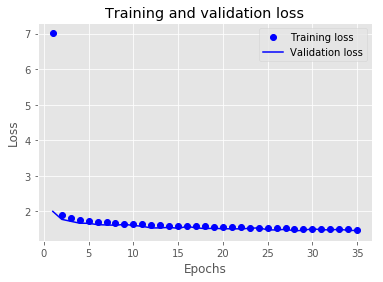

In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

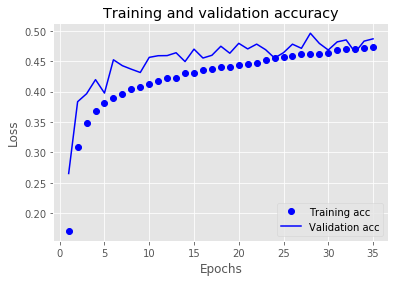

In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
plt.clf()   # clear figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()